In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

In [30]:
# 접근 주소를 정상적으로 얻을 수 없을 때 selenium 활용
from selenium import webdriver
from selenium.webdriver.common.by import By

In [4]:
driver = webdriver.Chrome('../chromedriver_win32/chromedriver.exe')
driver.get('http://naver.com')

c:\Users\sesac\.conda\envs\sesac\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  """Entry point for launching an IPython kernel.


In [7]:
# 1. webdriver로 생성된 chrome 창이 열려있지 않으면 오류 발생
# 2. 폴더가 선행되어 생성되지 않으면 False
driver.save_screenshot('DS/images/002.png')

True

In [8]:
# webdriver 닫기
driver.close()

## 서울시 구별 주유소 가격 정보 얻기

In [22]:
driver = webdriver.Chrome('../chromedriver_win32/chromedriver.exe')

c:\Users\sesac\.conda\envs\sesac\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  """Entry point for launching an IPython kernel.


In [24]:
# opinet은 사용자 접속 지역에 따라 자동으로 지역을 찾아주는 기능이 있음
driver.get("https://www.opinet.co.kr/searRgSelect.do")

In [45]:
gu_list_raw = driver.find_element(By.XPATH, '//*[@id="SIGUNGU_NM0"]')

In [46]:
gu_list = gu_list_raw.find_elements(By.TAG_NAME, 'option')

In [47]:
gu_list[0]

<selenium.webdriver.remote.webelement.WebElement (session="8bb2532e325fd523f388c71609bd93bb", element="d369738f-0f94-432b-8ed1-5732b0a4ee2d")>

In [49]:
gu_names = [option.get_attribute('value') for option in gu_list] # gu_list의option 태그값을 가져온다.
gu_names.remove('') # 공란 삭제
gu_names

['강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구']

In [51]:
# 조회 버튼 클릭
element_sel_gu = driver.find_element(By.XPATH, '//*[@id="searRgSelect"]').click()

In [52]:
# 조회 후 데이터 엑셀 저장 버튼 클릭
element_get_excel = driver.find_element(By.XPATH, '//*[@id="glopopd_excel"]').click()

In [56]:
# 구 선택
element = driver.find_element(By.ID, 'SIGUNGU_NM0')
element.send_keys(gu_names[11])

In [57]:
import time
from tqdm import tqdm

In [58]:
# 구별 휘발유 가격 엑셀 다운로드
for gu in tqdm(gu_names):
    element = driver.find_element(By.ID, 'SIGUNGU_NM0')
    element.send_keys(gu)
    
    time.sleep(2)
    
    element_sel_gu = driver.find_element(By.XPATH, '//*[@id="searRgSelect"]').click()
    time.sleep(1)
    element_get_excel = driver.find_element(By.XPATH, '//*[@id="glopopd_excel"]').click()
    time.sleep(1)

100%|██████████| 25/25 [01:59<00:00,  4.78s/it]


In [59]:
driver.close()

In [60]:
import pandas as pd
from glob import glob

In [62]:
stations_files = glob('DS/data/주유소/*.xls')
stations_files

['DS/data/주유소\\지역_위치별(주유소) (1).xls',
 'DS/data/주유소\\지역_위치별(주유소) (10).xls',
 'DS/data/주유소\\지역_위치별(주유소) (11).xls',
 'DS/data/주유소\\지역_위치별(주유소) (12).xls',
 'DS/data/주유소\\지역_위치별(주유소) (13).xls',
 'DS/data/주유소\\지역_위치별(주유소) (14).xls',
 'DS/data/주유소\\지역_위치별(주유소) (15).xls',
 'DS/data/주유소\\지역_위치별(주유소) (16).xls',
 'DS/data/주유소\\지역_위치별(주유소) (17).xls',
 'DS/data/주유소\\지역_위치별(주유소) (18).xls',
 'DS/data/주유소\\지역_위치별(주유소) (19).xls',
 'DS/data/주유소\\지역_위치별(주유소) (2).xls',
 'DS/data/주유소\\지역_위치별(주유소) (20).xls',
 'DS/data/주유소\\지역_위치별(주유소) (21).xls',
 'DS/data/주유소\\지역_위치별(주유소) (22).xls',
 'DS/data/주유소\\지역_위치별(주유소) (23).xls',
 'DS/data/주유소\\지역_위치별(주유소) (24).xls',
 'DS/data/주유소\\지역_위치별(주유소) (25).xls',
 'DS/data/주유소\\지역_위치별(주유소) (3).xls',
 'DS/data/주유소\\지역_위치별(주유소) (4).xls',
 'DS/data/주유소\\지역_위치별(주유소) (5).xls',
 'DS/data/주유소\\지역_위치별(주유소) (6).xls',
 'DS/data/주유소\\지역_위치별(주유소) (7).xls',
 'DS/data/주유소\\지역_위치별(주유소) (8).xls',
 'DS/data/주유소\\지역_위치별(주유소) (9).xls',
 'DS/data/주유소\\지역_위치별(주유소).xls']

In [63]:
tmp_raw = []

for file_name in stations_files:
    tmp = pd.read_excel(file_name, header=2) # 3행 컬럼부터 시작
    tmp_raw.append(tmp)
    
station_raw = pd.concat(tmp_raw)

In [64]:
station_raw.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),SK에너지,02-445-6870,Y,-,1920,1998,-
1,서울특별시,현대오일뱅크(주)직영 산성셀프주유소,서울 강남구 헌릉로 730,현대오일뱅크,02-2226-4963,Y,2198,1960,2001,-
2,서울특별시,현대오일뱅크 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),현대오일뱅크,02-529-5101,Y,2287,1975,2003,-
3,서울특별시,(주)중앙에너비스 수서지점,서울 강남구 광평로 202 (수서동),SK에너지,070-8707-4582,Y,2227,1977,2057,-
4,서울특별시,지에스칼텍스㈜에너지플러스허브GS타워,서울 강남구 논현로 516 (역삼동),GS칼텍스,02-539-5145,N,2176,1986,2020,-


In [65]:
station_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 486 entries, 0 to 31
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      486 non-null    object
 1   상호      486 non-null    object
 2   주소      486 non-null    object
 3   상표      486 non-null    object
 4   전화번호    486 non-null    object
 5   셀프여부    486 non-null    object
 6   고급휘발유   486 non-null    object
 7   휘발유     486 non-null    object
 8   경유      486 non-null    object
 9   실내등유    486 non-null    object
dtypes: object(10)
memory usage: 41.8+ KB


In [66]:
stations = pd.DataFrame(
    {'Oil_store':station_raw['상호'],
    '주소':station_raw['주소'],
    '가격':station_raw['휘발유'],
    '셀프':station_raw['셀프여부'],
    '상표':station_raw['상표']}
)

stations.head()

,Oil_store,주소,가격,셀프,상표
0,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),1920,Y,SK에너지
1,현대오일뱅크(주)직영 산성셀프주유소,서울 강남구 헌릉로 730,1960,Y,현대오일뱅크
2,현대오일뱅크 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),1975,Y,현대오일뱅크
3,(주)중앙에너비스 수서지점,서울 강남구 광평로 202 (수서동),1977,Y,SK에너지
4,지에스칼텍스㈜에너지플러스허브GS타워,서울 강남구 논현로 516 (역삼동),1986,N,GS칼텍스


In [68]:
stations['구'] = [ eachAdress.split()[1] for eachAdress in stations['주소']]
stations.head()

,Oil_store,주소,가격,셀프,상표,구
0,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),1920,Y,SK에너지,강남구
1,현대오일뱅크(주)직영 산성셀프주유소,서울 강남구 헌릉로 730,1960,Y,현대오일뱅크,강남구
2,현대오일뱅크 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),1975,Y,현대오일뱅크,강남구
3,(주)중앙에너비스 수서지점,서울 강남구 광평로 202 (수서동),1977,Y,SK에너지,강남구
4,지에스칼텍스㈜에너지플러스허브GS타워,서울 강남구 논현로 516 (역삼동),1986,N,GS칼텍스,강남구


In [71]:
stations['구'].unique()

array(['강남구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구',
       '송파구', '양천구', '강동구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구',
       '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구'], dtype=object)

In [72]:
stations[stations['구']=='서울특별시']

,Oil_store,주소,가격,셀프,상표,구


In [73]:
# 가격이 없는 주유소 제외
stations = stations[stations['가격'] != '-']
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478 entries, 0 to 31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Oil_store  478 non-null    object
 1   주소         478 non-null    object
 2   가격         478 non-null    object
 3   셀프         478 non-null    object
 4   상표         478 non-null    object
 5   구          478 non-null    object
dtypes: object(6)
memory usage: 26.1+ KB


In [74]:
# 가격 타입을 str -> float로 변경
stations['가격'] = stations['가격'].astype('float')
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478 entries, 0 to 31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Oil_store  478 non-null    object 
 1   주소         478 non-null    object 
 2   가격         478 non-null    float64
 3   셀프         478 non-null    object 
 4   상표         478 non-null    object 
 5   구          478 non-null    object 
dtypes: float64(1), object(5)
memory usage: 26.1+ KB


In [77]:
# 인덱스 초기화
stations.reset_index(inplace=True)
del stations['index']
stations.head()

,level_0,Oil_store,주소,가격,셀프,상표,구
0,0,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),1920.0,Y,SK에너지,강남구
1,1,현대오일뱅크(주)직영 산성셀프주유소,서울 강남구 헌릉로 730,1960.0,Y,현대오일뱅크,강남구
2,2,현대오일뱅크 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),1975.0,Y,현대오일뱅크,강남구
3,3,(주)중앙에너비스 수서지점,서울 강남구 광평로 202 (수서동),1977.0,Y,SK에너지,강남구
4,4,지에스칼텍스㈜에너지플러스허브GS타워,서울 강남구 논현로 516 (역삼동),1986.0,N,GS칼텍스,강남구


In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
# notebook 표기
%matplotlib inline

import platform

# - 깨짐 방지
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

# 한글 폰트 깨짐 방지
if( platform.system() =='Darwin' ):
    rc( 'font', family='AppleGothic' )
elif( platform.system() == 'Windows' ):
    path='c:/Windows/Fonts/malgun.ttf'
    font_name= font_manager.FontProperties( fname=path ).get_name()
    rc('font',family=font_name)
else: 
    print('error')

<AxesSubplot:title={'center':'가격'}, xlabel='셀프'>

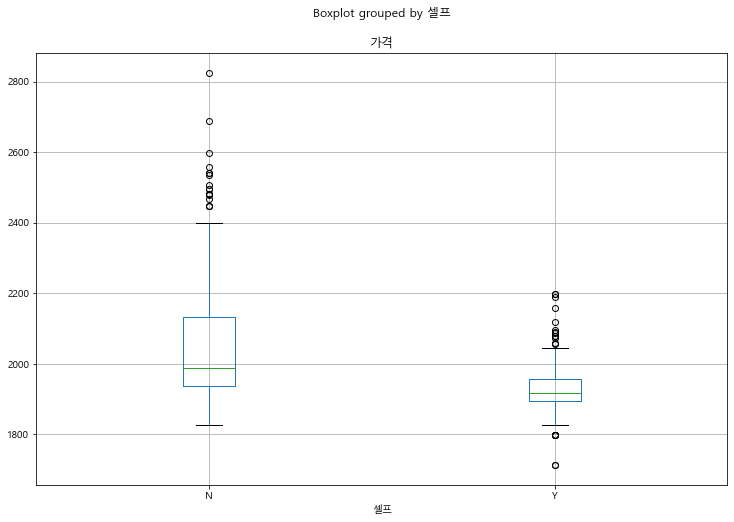

In [81]:
stations.boxplot(column='가격', by='셀프', figsize=(12,8))

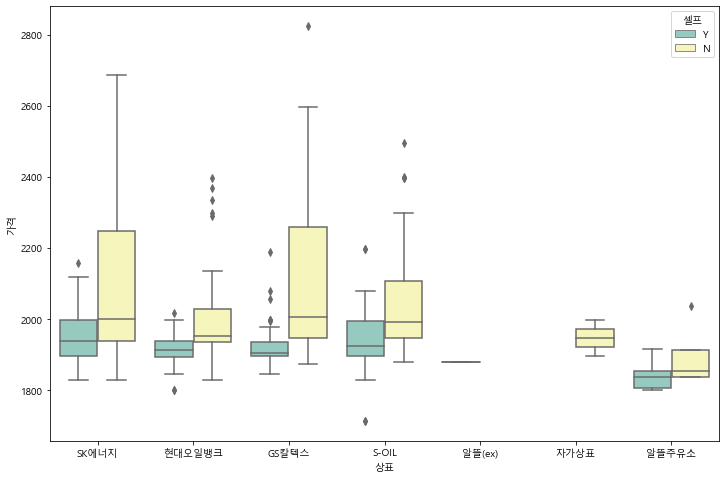

In [83]:
plt.figure(figsize=(12,8))
sns.boxplot(x='상표', y='가격', hue='셀프', data=stations, palette='Set3')
plt.show()

c:\Users\sesac\.conda\envs\sesac\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\sesac\.conda\envs\sesac\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 12.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


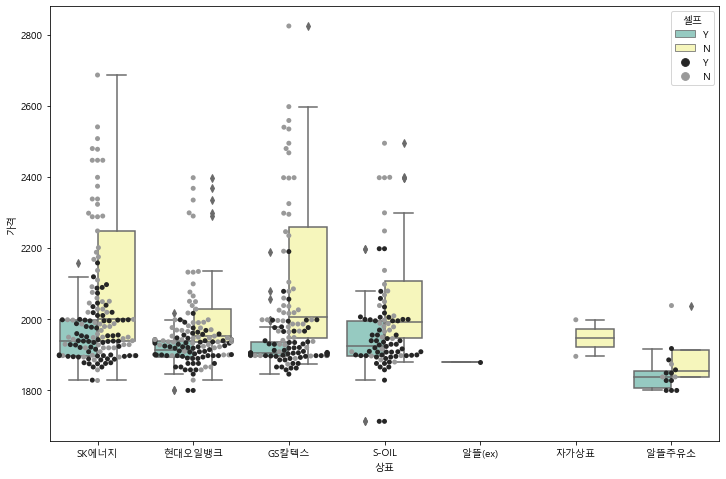

In [84]:
plt.figure(figsize=(12,8))
sns.boxplot(x='상표', y='가격', hue='셀프', data=stations, palette='Set3')
sns.swarmplot(x='상표', y='가격', hue='셀프', data=stations, color='.6')
plt.show()

## 서울시 구별 주유 가격 확인

In [85]:
import json
import folium
import googlemaps
import warnings
warnings.simplefilter(action='ignore', category= FutureWarning)

In [86]:
stations.sort_values(by='가격', ascending=False).head(10)

,Oil_store,주소,가격,셀프,상표,구
280,서계주유소,서울특별시 용산구 청파로 367 (청파동),2825.0,N,GS칼텍스,용산구
314,서남주유소,서울 중구 통일로 30,2687.0,N,SK에너지,중구
33,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2598.0,N,GS칼텍스,강남구
313,필동주유소,서울 중구 퇴계로 196 (필동2가),2559.0,N,GS칼텍스,중구
32,SK논현주유소,서울 강남구 논현로 747 (논현동),2541.0,N,SK에너지,강남구
419,구로주유소,서울 구로구 구로동로 137 (구로동),2540.0,N,GS칼텍스,구로구
31,(주)소모에너지 쎈트럴주유소,서울 강남구 삼성로 335,2535.0,N,GS칼텍스,강남구
30,갤러리아주유소,서울 강남구 압구정로 426,2508.0,N,SK에너지,강남구
132,양재최고주유소,서울 서초구 매헌로 72 (양재동),2495.0,N,S-OIL,서초구
304,(주)대양씨앤씨 사직주유소,서울 종로구 사직로 65 (사직동),2495.0,N,GS칼텍스,종로구


In [87]:
stations.sort_values(by='가격', ascending=True).head(10)

,Oil_store,주소,가격,셀프,상표,구
446,스카이주유소,서울 강서구 개화동로 457 (방화동),1712.0,Y,S-OIL,강서구
340,스카이주유소,서울 강서구 개화동로 457 (방화동),1712.0,Y,S-OIL,강서구
202,양천구주유소,서울 양천구 국회대로 275 (목동),1799.0,Y,알뜰주유소,양천구
341,목화주유소,서울 강서구 국회대로 251 (화곡동),1799.0,Y,알뜰주유소,강서구
342,이케이에너지(주) 강서주유소,서울 강서구 화곡로 273 (화곡동),1799.0,Y,현대오일뱅크,강서구
447,이케이에너지(주) 강서주유소,서울 강서구 화곡로 273 (화곡동),1799.0,Y,현대오일뱅크,강서구
448,목화주유소,서울 강서구 국회대로 251 (화곡동),1799.0,Y,알뜰주유소,강서구
203,가로공원주유소,서울 양천구 가로공원로 165 (신월동),1827.0,N,SK에너지,양천구
343,화곡역주유소,서울 강서구 강서로 154 (화곡동),1827.0,Y,알뜰주유소,강서구
449,화곡역주유소,서울 강서구 강서로 154 (화곡동),1827.0,Y,알뜰주유소,강서구


In [89]:
import numpy as np

In [94]:
gu_data = pd.pivot_table(stations, index=['구'], values=['가격'])
gu_data.head(10)

,가격
구,
강남구,2150.441176
강동구,2036.642857
강북구,1888.250000
강서구,1940.156250
관악구,1979.142857
광진구,1925.500000
구로구,2004.400000
금천구,1917.181818
노원구,1966.733333


In [93]:
# 구획의 색이 진할수록 휘발유 가격이 비싸다.
geo_path = 'DS/data/02. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(location=[37.5502, 126.982], zoom_start=10.5, tiles='Stamen Toner')

map.choropleth(
    geo_data = geo_str,
    data = gu_data,
    columns=[gu_data.index, '가격'],
    fill_color = 'PuRd',
    key_on = 'feature.id'
)

map

## 서울시 주유 가격 상하위 10개 주유소 지도에 표기하기

In [95]:
oil_price_top10 = stations.sort_values(by='가격', ascending=False).head(10) # 휘발유 가격 상위 10곳
oil_price_bottom10 = stations.sort_values(by='가격', ascending=True).head(10) # 휘발유 가격 하위 10곳

In [96]:
# google maps API
gmaps_key = ''
gmaps = googlemaps.Client(key=gmaps_key)

In [104]:
# 테스트
test1 = '서울 강서구 개화동로 457 (방화동)'
temp = gmaps.geocode(test1.split('(')[0], language='ko')
temp

[{'address_components': [{'long_name': '４５７',
    'short_name': '４５７',
    'types': ['premise']},
   {'long_name': '개화동로',
    'short_name': '개화동로',
    'types': ['political', 'sublocality', 'sublocality_level_4']},
   {'long_name': '강서구',
    'short_name': '강서구',
    'types': ['political', 'sublocality', 'sublocality_level_1']},
   {'long_name': '서울특별시',
    'short_name': '서울특별시',
    'types': ['administrative_area_level_1', 'political']},
   {'long_name': '대한민국',
    'short_name': 'KR',
    'types': ['country', 'political']},
   {'long_name': '157-220',
    'short_name': '157-220',
    'types': ['postal_code']}],
  'formatted_address': '대한민국 서울특별시 강서구 개화동로 457',
  'geometry': {'location': {'lat': 37.57148189999999, 'lng': 126.8043676},
   'location_type': 'ROOFTOP',
   'viewport': {'northeast': {'lat': 37.57283088029149,
     'lng': 126.8057165802915},
    'southwest': {'lat': 37.5701329197085, 'lng': 126.8030186197085}}},
  'place_id': 'ChIJgc-3M5acfDURhvY4gYtlDo4',
  'plus_code': {

In [105]:
temp[0].get('geometry')

{'location': {'lat': 37.57148189999999, 'lng': 126.8043676},
 'location_type': 'ROOFTOP',
 'viewport': {'northeast': {'lat': 37.57283088029149,
   'lng': 126.8057165802915},
  'southwest': {'lat': 37.5701329197085, 'lng': 126.8030186197085}}}

In [102]:
# 전체 주유소 위도/경도 확인 및 저장
lat = []
lng = []

for x in tqdm(stations.index):
    try:
        tmp_add = stations['주소'][x].split('(')[0]
        tmp_map = gmaps.geocode(tmp_add)
        
        tmp_loc = tmp_map[0].get('geometry')
        lat.append(tmp_loc['location']['lat'])
        lng.append(tmp_loc['location']['lng'])
        
    except :
        lat.append(np.nan)
        lng.append(np.nan)
        print('Here is nan!')
        
stations['lat'] = lat
stations['lng'] = lng

100%|██████████| 478/478 [00:48<00:00,  9.88it/s]


In [103]:
stations.head()

,Oil_store,주소,가격,셀프,상표,구,lat,lng
0,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),1920.0,Y,SK에너지,강남구,37.467210,127.118713
1,현대오일뱅크(주)직영 산성셀프주유소,서울 강남구 헌릉로 730,1960.0,Y,현대오일뱅크,강남구,37.466478,127.119039
2,현대오일뱅크 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),1975.0,Y,현대오일뱅크,강남구,37.485377,127.043307
3,(주)중앙에너비스 수서지점,서울 강남구 광평로 202 (수서동),1977.0,Y,SK에너지,강남구,37.483993,127.094978
4,지에스칼텍스㈜에너지플러스허브GS타워,서울 강남구 논현로 516 (역삼동),1986.0,N,GS칼텍스,강남구,37.502695,127.036474


In [106]:
oil_price_top10 = stations.sort_values(by='가격', ascending=False).head(10) # 휘발유 가격 상위 10곳
oil_price_bottom10 = stations.sort_values(by='가격', ascending=True).head(10) # 휘발유 가격 하위 10곳

In [109]:
# 서울시 휘발유값 Top 10, Bottom 10 표시
map = folium.Map(location=[37.5202, 126.975], zoom_start=10.5, tiles='Stamen Toner')

for x in oil_price_top10.index:
    if pd.notnull(oil_price_top10['lat'][x]):
        folium.CircleMarker(
            [oil_price_top10['lat'][x], oil_price_top10['lng'][x]],
            radius=15, color='#CD3181', # 분홍색
            fill_color='#CD3181', fill=True).add_to(map)

for x in oil_price_bottom10.index:
    if pd.notnull(oil_price_bottom10['lat'][x]):
        folium.CircleMarker(
            [oil_price_bottom10['lat'][x], oil_price_bottom10['lng'][x]],
            radius=15, color='#3186cc', # 파란색
            fill_color='#3186cc', fill=True).add_to(map)

map